In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

/home/NCAOR/supriyog/anaconda3/envs/clim/lib/python3.10/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [99]:
BoB_new_filtered=xr.open_mfdataset('/home/NCAOR/supriyog/raw_data/SL_anomaly/IO_SLA_v2021_low_new.nc')

In [ ]:
BoB_new_filtered

In [96]:
BoB_new_filtered=BoB_new_filtered.SLA_LOW

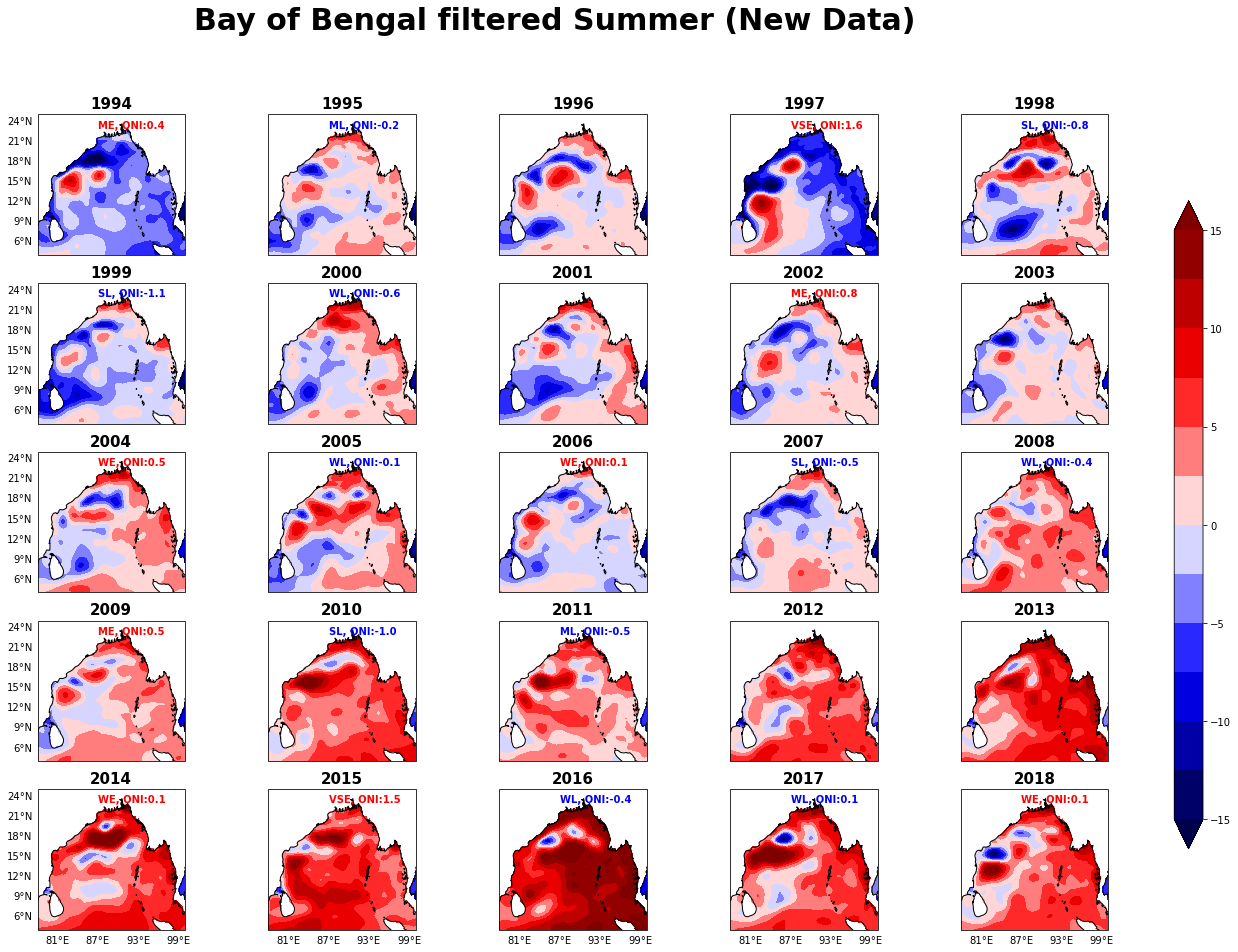

In [98]:
########## Data ########
BoB_unfiltered_summer={}
for i in range(1994,2019):
    summer_unfiltered=BoB_new_filtered.sel(TIME=slice(repr(i)+'-06-01',repr(i)+'-08-31')).mean(dim='TIME')
    BoB_unfiltered_summer[i]=[]
    BoB_unfiltered_summer[i].append(summer_unfiltered)
    
########## Info ######
Summer_enso_info={}
Summer_enso_info=dict({1993:None,1994:'ME, ONI:0.4',1995:'ML, ONI:-0.2',1996: None,1997:'VSE, ONI:1.6',
                    1998:'SL, ONI:-0.8',1999:'SL, ONI:-1.1',2000:'WL, ONI:-0.6',2001:None,2002:'ME, ONI:0.8',
                    2003:None,2004:'WE, ONI:0.5',2005:'WL, ONI:-0.1',2006:'WE, ONI:0.1',2007:'SL, ONI:-0.5',
                    2008:'WL, ONI:-0.4',2009:'ME, ONI:0.5',2010:'SL, ONI:-1.0',2011:'ML, ONI:-0.5',2012:None,
                    2013:None,2014:'WE, ONI:0.1',2015:'VSE, ONI:1.5',2016:'WL, ONI:-0.4',2017:'WL, ONI:0.1',
                    2018:'WE, ONI:0.1',2019:None,2020:'ML, ONI:-0.4',2021:'ML, ONI:-0.4'})

Elnino_years=[1994,1997,2002,2004,2006,2009,2014,2015,2018]
Lanina_years=[1995,1998,1999,2000,2005,2007,2008,2010,2011,2016,2017,2020,2021]

##########   Ploting ###########
fig, axs = plt.subplots(nrows=5,ncols=5,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(20,15))

axs=axs.flatten()
y_label=set([0,5,10,15,20])
x_label=set([20,21,22,23,24])
levels=[-15,-12.5,-10,-7.5,-5,-2.5,0,2.5,5,7.5,10,12.5,15]
for i,year in enumerate(BoB_unfiltered_summer):
        data=BoB_unfiltered_summer[year]
        cs=axs[i].contourf(BoB_unfiltered.LONGITUDE.data,BoB_unfiltered.LATITUDE.data,data[0],
                          levels=levels,transform = ccrs.PlateCarree(),
                          cmap='seismic',extend='both')
        axs[i].set_extent([78,100,4,25])
        axs[i].set_title(year,fontsize = 15, weight='bold')
        axs[i].coastlines()
        if i in y_label:
            gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0,)
            gl.top_labels = False
            gl.bottom_labels = False
            gl.right_labels = False
            #gl.xlines=False
        if i in x_label:
            gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0,)
            gl.top_labels = False
            gl.left_labels = False
            gl.right_labels = False
        if year in Elnino_years:
            axs[i].text(87,23, Summer_enso_info[year],color='red', fontsize = 10,weight='bold')
        if year in Lanina_years:
            axs[i].text(87,23, Summer_enso_info[year],color='blue', fontsize = 10,weight='bold')

cb_ax=fig.add_axes([0.93,0.2,0.02,0.6])
cba=fig.colorbar(cs,cax=cb_ax)
plt.suptitle("Bay of Bengal filtered Summer (New Data)",fontsize = 30,weight='bold',fontname='Times New Roman')
plt.savefig('BoB_filtered_new_data.jpg',dpi=100)